Part 1 (6 points): Your objective is to perform Exploratory data analysis on the dataset. Complete the following:

Identify shape, size of the raw data (1 point)

Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)

Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

Visualize the dataset through different univariate analysis and comment on your observations (2)

Perform one-hot encoding on categorical variables (1 point)

In [486]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [487]:
data = pd.read_csv('cancerData.txt', delimiter=",")
print(data)
# shape [386 rows x 10 columns] 
# size (386x10 = 3680 entries)

                    class    age menopause tumor-size inv-nodes node-caps  \
0       recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2       recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
381  no-recurrence-events  40-49   premeno      30-34       3-5        no   
382  no-recurrence-events  60-69      ge40      30-34       3-5       yes   
383  no-recurrence-events  70-79   premeno      20-24       0-2        no   
384  no-recurrence-events  70-79   premeno      30-34      9-11        no   
385  no-recurrence-events  60-69   premeno      30-34      9-11        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_

In [488]:
print(data.dtypes)
# 9/10 variables are objects (categorical) and would require encoding

anyduplicates = data[data.duplicated()]
print(anyduplicates)
data = data.drop_duplicates()
#duplicates were present (anyduplicates) and treated in the original dataframe data

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object
                    class    age menopause tumor-size inv-nodes node-caps  \
91   no-recurrence-events  50-59      ge40      20-24       0-2        no   
111  no-recurrence-events  50-59      ge40      15-19       0-2        no   
113  no-recurrence-events  40-49   premeno      10-14       0-2        no   
171  no-recurrence-events  30-39   premeno      15-19       0-2        no   
207     recurrence-events  50-59   premeno      25-29       0-2        no   
210     recurrence-events  40-49   premeno      20-24       0-2        no   
237     recurrence-events  40-49   premeno      25-29       0-2        no   
268     recurrence-events  30-39   premeno      35-39       0-2        no   
280     recurrence-events  50-59      ge40      40-44       6-8       yes

In [489]:
data.info() # two columns with only 385/386
print(data.isna().sum()) # seen more clearly here
missing_rows = data[data.isna().any(axis=1)]
print(missing_rows) #see specific observations entirely


#rows, columns = data.shape
#nanCount = 0
#for x in range rows: #traverse rows
#    for y in range columns: # traverse cols
#        if pd.isna(data.iloc[x, y]):
#            nanCount +=1



<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        375 non-null    object
 1   age          375 non-null    object
 2   menopause    375 non-null    object
 3   tumor-size   374 non-null    object
 4   inv-nodes    374 non-null    object
 5   node-caps    375 non-null    object
 6   deg-malig    375 non-null    int64 
 7   breast       375 non-null    object
 8   breast-quad  375 non-null    object
 9   irradiat     375 non-null    object
dtypes: int64(1), object(9)
memory usage: 32.2+ KB
class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64
                    class    age menopause tumor-size inv-nodes node-caps  \
168  no-recurrence-events  50-59   premeno        NaN       0-2        no   
261     recurrence-e

In [490]:
for col in data.columns:
    print(col)
    print(data[col].unique())

#other abnormalities/nulls  data[data['breast-quad'] == '?' or data['breast-quad'] == '*'] and 
# data[data['node-caps'] == '?' or data['node-caps'] == '*']

class
['recurrence-events' 'no-recurrence-events']
age
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause
['premeno' 'ge40' 'lt40']
tumor-size
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49' nan]
inv-nodes
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' nan '24-26']
node-caps
['no' '*' 'yes' '?']
deg-malig
[3 2 1]
breast
['left' 'right']
breast-quad
['left_low' 'right_up' 'left_up' 'right_low' '?' 'central' '*']
irradiat
['no' 'yes']


In [491]:
nodecOther = data[data['node-caps'] == '?']
nodeOther = data[data['node-caps'] == '*']
print(nodecOther)
breastqOther = data[data['breast-quad'] == '?']
breastOther = data[data['breast-quad'] == '*']
breastIndex = breastqOther.index 
print(breastqOther)
print(breastIndex)

                    class    age menopause tumor-size inv-nodes node-caps  \
145  no-recurrence-events  40-49   premeno      25-29       0-2         ?   
163  no-recurrence-events  60-69      ge40      25-29       3-5         ?   
164  no-recurrence-events  60-69      ge40      25-29       3-5         ?   
183  no-recurrence-events  50-59      ge40      30-34      9-11         ?   
233  no-recurrence-events  70-79      ge40      15-19      9-11         ?   
263     recurrence-events  50-59      lt40      20-24       0-2         ?   

     deg-malig breast breast-quad irradiat  
145          2   left   right_low      yes  
163          1  right     left_up      yes  
164          1  right    left_low      yes  
183          3   left     left_up      yes  
233          1   left    left_low      yes  
263          1   left     left_up       no  
                    class    age menopause tumor-size inv-nodes node-caps  \
6       recurrence-events  50-59   premeno      25-29       0-2     

In [492]:
mrow_indicies = data[data.isna().any(axis=1)].index
df = data.drop(index=mrow_indicies)

nodecOther = df[df['node-caps'] == '?']
nodeOther = df[df['node-caps'] == '*']
nodeCIn = nodecOther.index
nodeIn = nodeOther.index
df.drop(index=nodeCIn, inplace = True)
df.drop(index=nodeIn, inplace = True)

breastqOther = df[df['breast-quad'] == '?']
breastOther = df[df['breast-quad'] == '*']
df.drop(index=breastqOther.index, inplace = True)
df.drop(index=breastOther.index , inplace = True)

for col in df.columns:
    print(col)
    print(df[col].unique())

# all nan, ?, * removed in df for imputation back into data

class
['recurrence-events' 'no-recurrence-events']
age
['30-39' '40-49' '60-69' '50-59' '70-79']
menopause
['premeno' 'ge40' 'lt40']
tumor-size
['30-34' '20-24' '15-19' '0-4' '50-54' '25-29' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps
['no' 'yes']
deg-malig
[3 2 1]
breast
['left' 'right']
breast-quad
['left_low' 'right_up' 'left_up' 'right_low' 'central']
irradiat
['no' 'yes']


In [493]:
print(df.columns)
df = pd.get_dummies(df, columns=["tumor-size", "inv-nodes", "node-caps", "breast-quad"], drop_first=True)
print(df.columns)
df.info()

#new df without missing rows
#encode the new d

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')
Index(['class', 'age', 'menopause', 'deg-malig', 'breast', 'irradiat',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11',
       'node-caps_yes', 'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 0 to 385
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   class                  356 non-null    object
 1   age                    

In [494]:
mode_values = data.mode().iloc[0]  
print(mode_values)
data['tumor-size'] = data['tumor-size'].fillna('30-34')
data['inv-nodes'] = data['inv-nodes'].fillna('0-2')
data["node-caps"] = data["node-caps"].replace("?", "no")
data["node-caps"] = data["node-caps"].replace("*", "no")
data["breast-quad"] = data["breast-quad"].replace("?", "left_low")
data["breast-quad"] = data["breast-quad"].replace("*", "left_low")

class          no-recurrence-events
age                           40-49
menopause                   premeno
tumor-size                    30-34
inv-nodes                       0-2
node-caps                        no
deg-malig                         2
breast                         left
breast-quad                left_low
irradiat                         no
Name: 0, dtype: object


In [495]:
#THIS IMPUTATION METHOD RESULTED IN A LOWER ACCURACY
#group new df by deg- malig and see mean of encoded values of interest
#print(df.groupby(['deg-malig']).mean(numeric_only=True))
#observing the corresponding deg-malig of each of the missing values the most appropriate (highest mean) value is selected to fill the data
#data['tumor-size'] = data['tumor-size'].fillna('20-24')
#data['inv-nodes'] = data['inv-nodes'].fillna('3-5')
#data["node-caps"] = data["node-caps"].replace("?", "no")
#data["node-caps"] = data["node-caps"].replace("*", "no")
#data["breast-quad"] = data["breast-quad"].replace("?", "left_low")
#data["breast-quad"] = data["breast-quad"].replace("*", "left_low")

In [496]:
for col in data.columns:
    print(col)
    print(data[col].unique())

class
['recurrence-events' 'no-recurrence-events']
age
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause
['premeno' 'ge40' 'lt40']
tumor-size
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps
['no' 'yes']
deg-malig
[3 2 1]
breast
['left' 'right']
breast-quad
['left_low' 'right_up' 'left_up' 'right_low' 'central']
irradiat
['no' 'yes']


In [497]:
#before making the final one hot encoding we will visualize
data.describe()
#df.describe()
#here we get summary statistics of the only numerical variable deg-malig

,deg-malig
count,375.000000
mean,2.074667
std,0.752730
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


<Axes: xlabel='count', ylabel='age'>

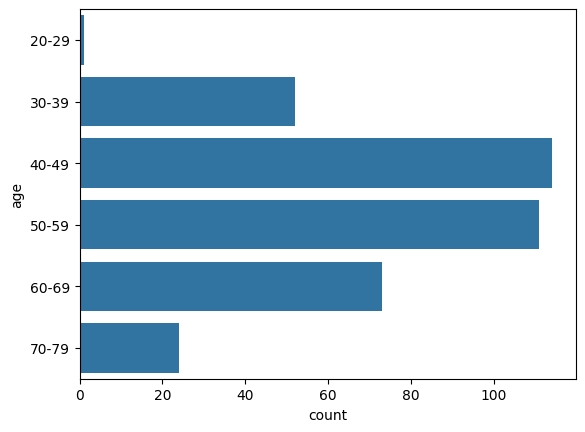

In [498]:
#age distribution of patients
#unimodal
sns.countplot(data=data['age'], order=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])


Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')


<Axes: xlabel='breast-quad', ylabel='Count'>

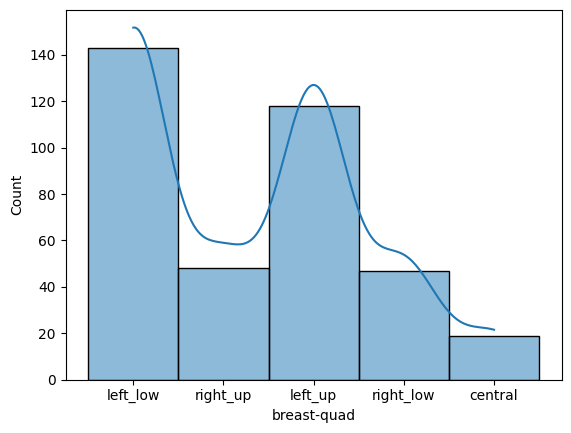

In [499]:
print(data.columns)
#print(data['breast-quad'].unique())
sns.histplot(data=data['breast-quad'], kde=True)
#seems to primarily be found in leftern region

<Axes: xlabel='irradiat'>

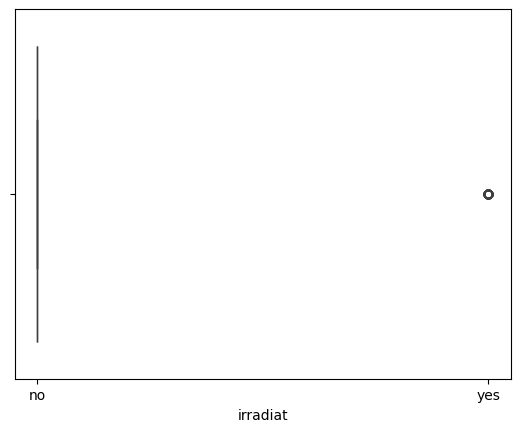

In [500]:
sns.boxplot(data=data, x='irradiat')
#the measure of spread seems to be so highly skewed for the irradiat variable that the yes response is an outlier

In [501]:
#HOT ENCODE DATA 
encodedD = pd.get_dummies(data, columns=['class', 'age', 'menopause', "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)

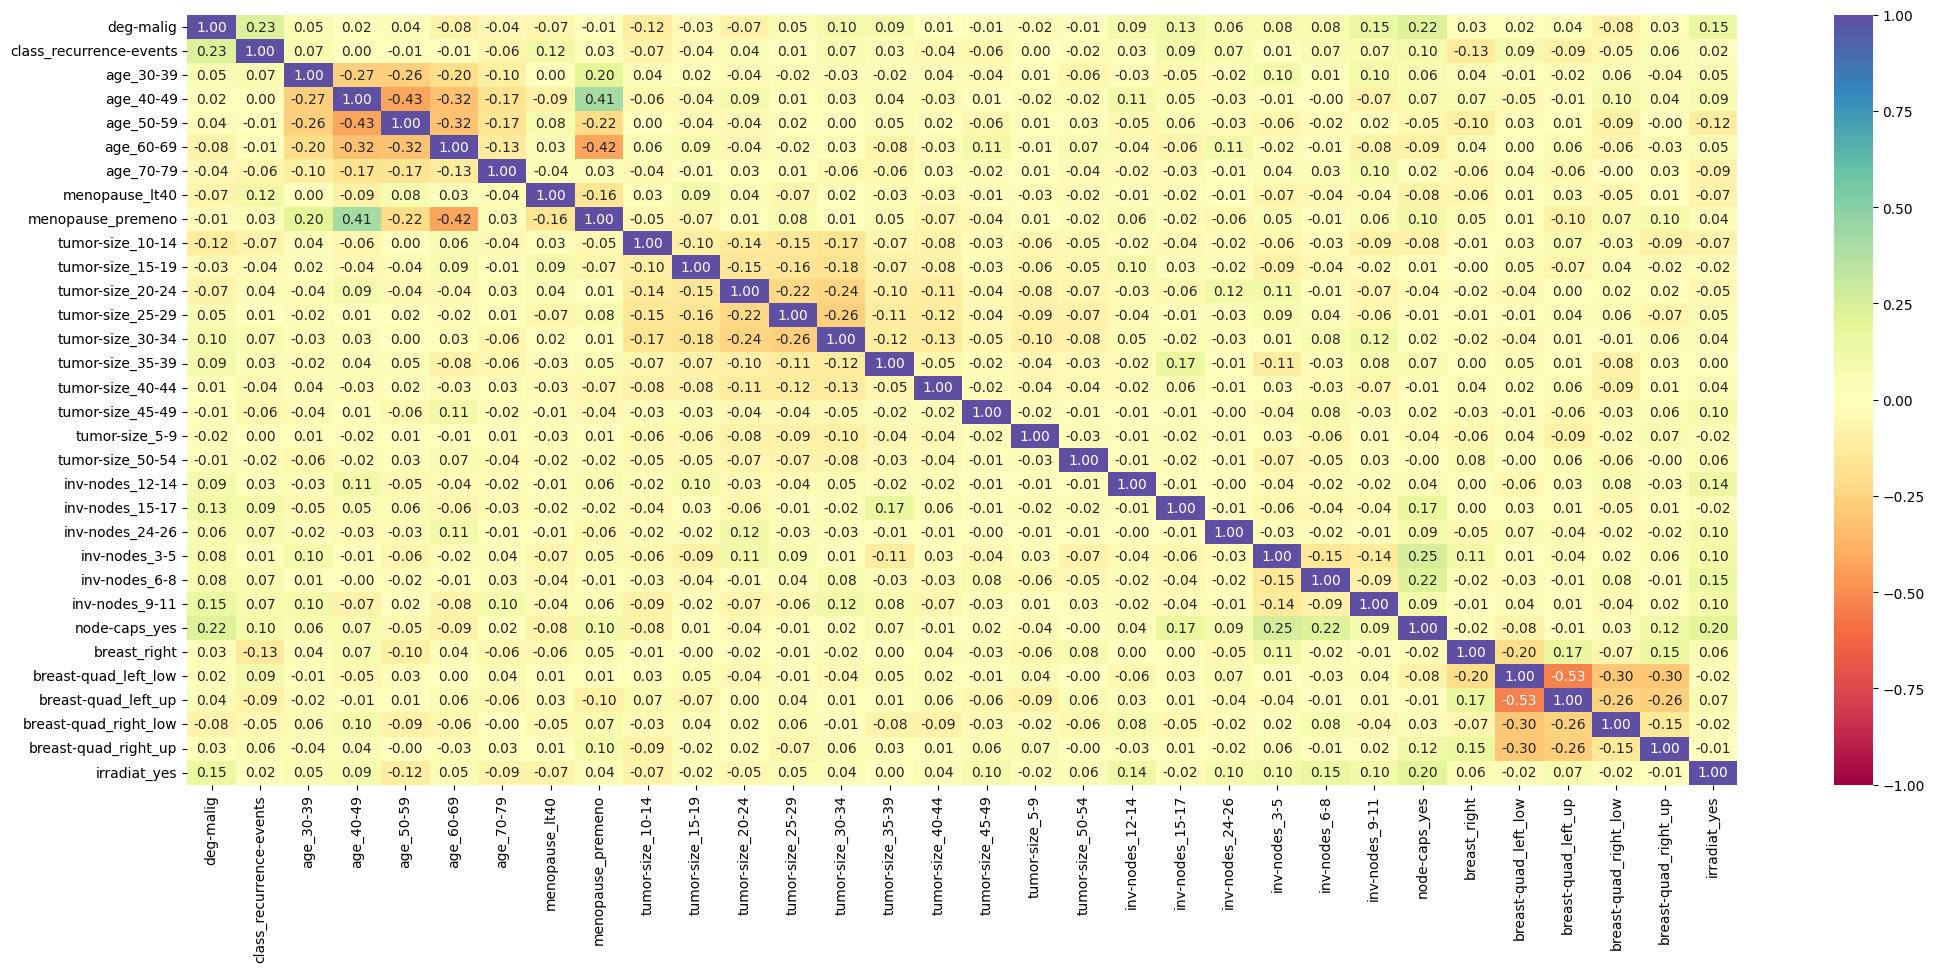

In [502]:
corr_matrix = encodedD.corr()

plt.figure(figsize=(25, 10))

sns.heatmap(
   corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

#with this correlation matrix we can see how different variables are correlated
#some intuitive like age and menopause 
#some more specific to our data such as the deg-malig to our recurrence class at a whopping 0.23!

In [503]:
print(encodedD.columns)

Index(['deg-malig', 'class_recurrence-events', 'age_30-39', 'age_40-49',
       'age_50-59', 'age_60-69', 'age_70-79', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_10-14', 'tumor-size_15-19',
       'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34',
       'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49',
       'tumor-size_5-9', 'tumor-size_50-54', 'inv-nodes_12-14',
       'inv-nodes_15-17', 'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_yes', 'breast_right',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_yes'],
      dtype='object')


Part 2 (9 points): Fit Classification models on the data to predict the recurrence class:

Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)

Perform classification using (6 points)
K-Nearest Neighbor Classifier

K-Nearest Neighbor Classifier using Grid search CV

Linear classification

Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)

In [504]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

from sklearn.linear_model import SGDClassifier


In [505]:
#Data Split
X = encodedD.drop('class_recurrence-events', axis=1)
y = encodedD['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [506]:
#KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Checking the metrics on the test data
accuracy_test=accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print("Testing\nAccuracy: ", accuracy_test)
print("Recall: ", recall_test)
print("Precision: ", precision_test)
print("F1: ", f1_test)

# Checking metrics on the training data
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
recall_train = recall_score(y_train, knn.predict(X_train))
precision_train = precision_score(y_train, knn.predict(X_train))
f1_train = f1_score(y_train, knn.predict(X_train))
print("Training\nAccuracy: ", accuracy_train)
print("Recall: ", recall_train)
print("Precision: ", precision_train)
print("F1: ", f1_train)

Testing
Accuracy:  0.6548672566371682
Recall:  0.16666666666666666
Precision:  0.4
F1:  0.23529411764705882
Training
Accuracy:  0.7786259541984732
Recall:  0.3176470588235294
Precision:  1.0
F1:  0.4821428571428571


In [507]:
#KNN grid search

knn2 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 2, 5, 8, 10 ],  # neighbors to test
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

grid_search = GridSearchCV(knn2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Checking the metrics on the test data
accuracy_test=accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
print("Testing\nAccuracy: ", accuracy_test)
print("Recall: ", recall_test)
print("Precision: ", precision_test)
print("F1: ", f1_test)

# Checking metrics on the training data
accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
recall_train = recall_score(y_train, best_knn.predict(X_train))
precision_train = precision_score(y_train, best_knn.predict(X_train))
f1_train = f1_score(y_train, best_knn.predict(X_train))
print("Training\nAccuracy: ", accuracy_train)
print("Recall: ", recall_train)
print("Precision: ", precision_train)
print("F1: ", f1_train)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Testing
Accuracy:  0.6902654867256637
Recall:  0.1388888888888889
Precision:  0.5555555555555556
F1:  0.22222222222222227
Training
Accuracy:  0.6946564885496184
Recall:  0.15294117647058825
Precision:  0.6190476190476191
F1:  0.24528301886792456


In [508]:
#Linear Classification

clf = SGDClassifier(loss="perceptron", alpha=0.01)

clf.fit(X_train, y_train)

# Checking the metrics on the test data
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
recall_test = recall_score(y_test, clf.predict(X_test))
precision_test = precision_score(y_test, clf.predict(X_test))
f1_test = f1_score(y_test, clf.predict(X_test))
print("Testing\nAccuracy: ", accuracy_test)
print("Recall: ", recall_test)
print("Precision: ", precision_test)
print("F1: ", f1_test)

# Checking metrics on the training data
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
recall_train = recall_score(y_train, clf.predict(X_train))
precision_train = precision_score(y_train, clf.predict(X_train))
f1_train = f1_score(y_train, clf.predict(X_train))
print("Training\nAccuracy: ", accuracy_train)
print("Recall: ", recall_train)
print("Precision: ", precision_train)
print("F1: ", f1_train)

#higher training accuracy some overfitting

Testing
Accuracy:  0.6814159292035398
Recall:  0.027777777777777776
Precision:  0.5
F1:  0.05263157894736842
Training
Accuracy:  0.6908396946564885
Recall:  0.058823529411764705
Precision:  0.8333333333333334
F1:  0.10989010989010989
